<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT24/blob/chmntz_Lab5/Lab5/chmntz_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Differential Equations**
Carl **Chemnitz**

# **Abstract**

# **Set up environment**
To have access to the neccessary modules you have to run this cell.

In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from typing import Callable

# **Introduction**

# **Method**

## Time stepping for scalar initial value problem $\frac{du}{dt}=f(u,t)$.

The algorithm implemented in this lab to solve scalar initial value problems was Heun's method. It is a predictor-corrector method that combines explicit Euler method
$$u_{i+1}=u_{i}+hf(u_i,t_i),$$
and the trapezoidal method
$$u_{i+1}=u_i+\frac{h}{2}\Big(f(u_i,t_i)+f(u_{i+1},t_{t+1})\Big).$$


In [9]:
def scalar_timestep(f: Callable, u0: float, t0: float, n: int):
    t, u = 0, np.zeros(n)
    h = t0 / n
    u[0] = u0
    for i in range(1, len(u)):
        u[i] = u[i-1] + (h / 2) * (f(u[i-1], t) + f((u[i-1] + h * f(u[i-1], t+h)), t + h))
        t += h
    return u

In [10]:
f = lambda u, t : -u + t**2

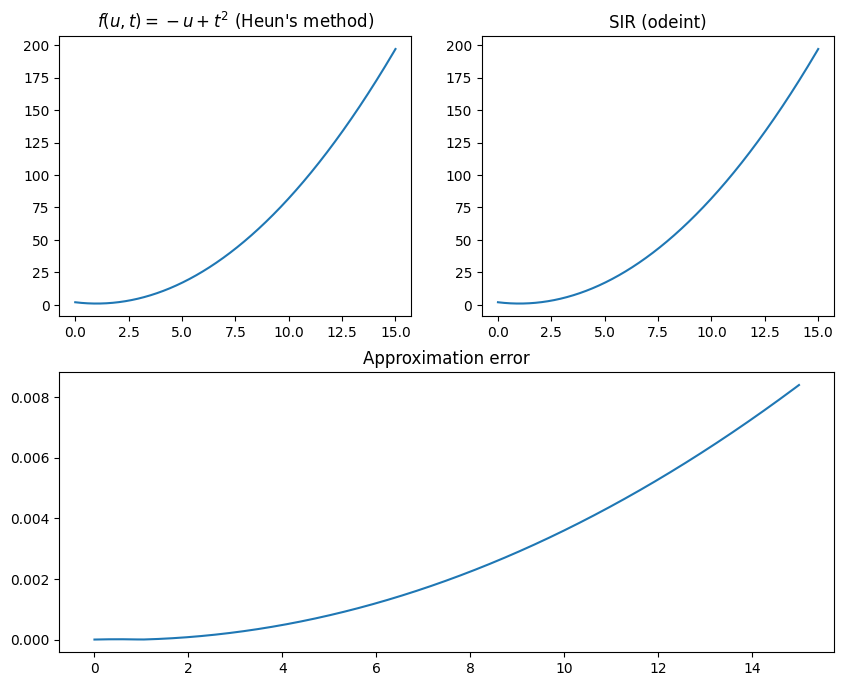

In [5]:
t = np.linspace(0, 15, 50000)
u_approx = scalar_timestep(f, 2, 15, 50000)
u_exact = sp.integrate.odeint(f, 2, t)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(221)
ax1.title.set_text("$f(u,t)=-u+t^2$ (Heun's method)")
ax1.plot(t, u_approx)

ax2 = fig.add_subplot(222)
ax2.title.set_text("SIR (odeint)")
ax2.plot(t, u_exact)

ax3 = fig.add_subplot(212)
ax3.title.set_text("Approximation error")
diff = np.abs(u_approx - u_exact[:,0])
ax3.plot(t, diff)
fig.show()

## Time stepping for a system of initial value problems $\frac{du}{dt}=f(u,t)$

In [6]:
def system_timestep(f: Callable, u0: np.array(2, dtype=float), t0: float, n: int):
    dim = u0.shape[0]
    t, u = 0, np.zeros([n, dim])
    h = t0 / n
    u[0, :] = u0[:]
    for i in range(1, len(u)):
        u[i, :] = u[i-1, :] + (h / 2) * (f(u[i-1, :], t) + f((u[i-1, :] + h * f(u[i-1, :], t+h)), t + h))
        t += h
    return u

In [7]:
beta, gamma, N = 0.2, 0.05, 1.0
def SIR(SIR: np.array, t: float):
    S = -beta * SIR[1] * SIR[0] / N
    I = beta * SIR[1] * SIR[0] / N - gamma * SIR[1]
    R = gamma * SIR[1]
    return np.array([S, I, R])

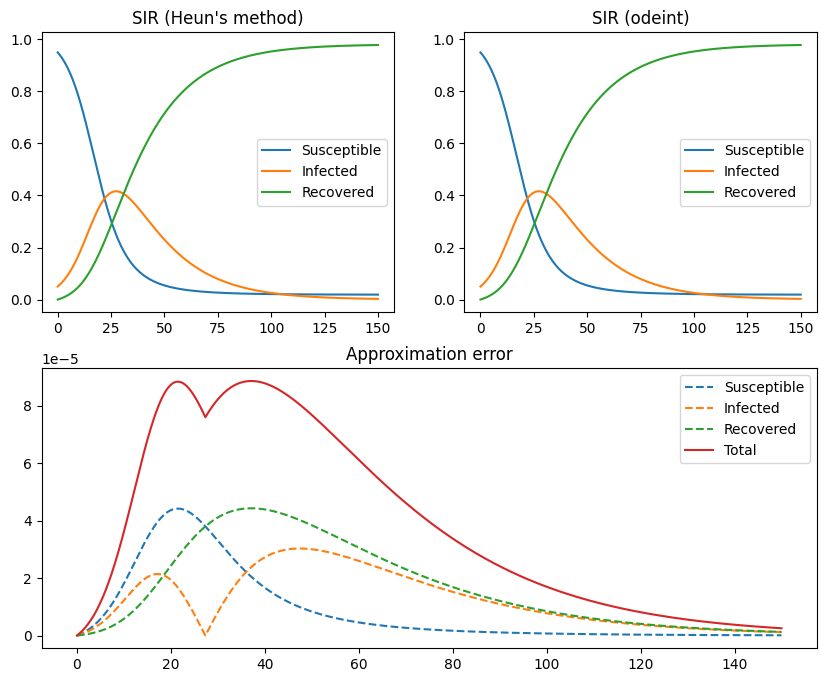

In [13]:
t = np.linspace(0, 150, 15000)
u_approx = system_timestep(SIR, np.array([0.95, 0.05, 0.00]), 150, 15000)
u_exact = sp.integrate.odeint(SIR, np.array([0.95, 0.05, 0.00]), t)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(221)
ax1.title.set_text("SIR (Heun's method)")
ax1.plot(t, u_approx)
ax1.legend(['Susceptible', 'Infected', 'Recovered'])

ax2 = fig.add_subplot(222)
ax2.title.set_text("SIR (odeint)")
ax2.plot(t, u_exact)
ax2.legend(['Susceptible', 'Infected', 'Recovered'])

ax3 = fig.add_subplot(212)
ax3.title.set_text("Approximation error")
diff = np.abs(u_approx[:] - u_exact[:,:])
diff_t = [np.sum(np.abs(u_approx[i, :] - u_exact[i, :])) for i in range(0, len(u_approx))]
ax3.plot(t, diff, '--')
ax3.plot(t, diff_t)
ax3.legend(['Susceptible', 'Infected', 'Recovered', 'Total'])
fig.show()

# **Results**

# **Discussion**